# Homework 6

### Name : Anushka Kamath
### Github Username : anushkakamath
### USC email id : arkamath@usc.edu
### USC ID : 9418501008

Using one late day for this assignment.   
Pls note : Submission without the training data since file too large. As the instructor said its okay to submit without data file. 
https://piazza.com/class/l7149q4oxue34e/post/1237

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import seaborn as sns
import math
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix
from imblearn.over_sampling import SMOTE 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error 

# 1. Tree-Based Methods
(a) Download the APS Failure data

https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html

In [2]:
# train = pd.read_csv("aps_failure_training_set.csv", skiprows=20)
# test = pd.read_csv("aps_failure_test_set.csv", skiprows=20)
train = pd.read_csv("../data/aps_failure_training_set.csv", skiprows=20)
test = pd.read_csv("../data/aps_failure_test_set.csv", skiprows=20)

In [3]:
train

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,neg,153002,na,664,186,0,0,0,0,0,...,998500,566884,1290398,1218244,1019768,717762,898642,28588,0,0
59996,neg,2286,na,2130706538,224,0,0,0,0,0,...,10578,6760,21126,68424,136,0,0,0,0,0
59997,neg,112,0,2130706432,18,0,0,0,0,0,...,792,386,452,144,146,2622,0,0,0,0
59998,neg,80292,na,2130706432,494,0,0,0,0,0,...,699352,222654,347378,225724,194440,165070,802280,388422,0,0


In [4]:
test

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,60,0,20,12,0,0,0,0,0,...,1098,138,412,654,78,88,0,0,0,0
1,neg,82,0,68,40,0,0,0,0,0,...,1068,276,1620,116,86,462,0,0,0,0
2,neg,66002,2,212,112,0,0,0,0,0,...,495076,380368,440134,269556,1315022,153680,516,0,0,0
3,neg,59816,na,1010,936,0,0,0,0,0,...,540820,243270,483302,485332,431376,210074,281662,3232,0,0
4,neg,1814,na,156,140,0,0,0,0,0,...,7646,4144,18466,49782,3176,482,76,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,neg,81852,na,2130706432,892,0,0,0,0,0,...,632658,273242,510354,373918,349840,317840,960024,25566,0,0
15996,neg,18,0,52,46,8,26,0,0,0,...,266,44,46,14,2,0,0,0,0,0
15997,neg,79636,na,1670,1518,0,0,0,0,0,...,806832,449962,778826,581558,375498,222866,358934,19548,0,0
15998,neg,110,na,36,32,0,0,0,0,0,...,588,210,180,544,1004,1338,74,0,0,0


(b) Data Preparation

i. Research what types of techniques are usually used for dealing with data with missing values. Pick at least one of them and apply it to this data in the next steps.

ANS : Mean substitution, Regression imputation, Maximum likelihood, Case deletion, are typically employed for dealing with missing value data.

https://towardsdatascience.com/6-different-ways-to-compensate-for-missing-values-data-imputation-with-examples-6022d9ca0779  

Impute missing values - 
https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html
https://www.geeksforgeeks.org/ml-handle-missing-data-with-simple-imputer/

In [5]:
#Cannot use SimpleInputer on non-numeric data here class columnn (neg,pos)
train['class'] = train['class'].apply(lambda x: 0 if x=='neg' else 1)
test['class'] = test['class'].apply(lambda x: 0 if x=='neg' else 1)
# train_data = train.iloc[:, 1:]
# test_data = test.iloc[:, 1:]
#Cannot use SimpleInputer on non-numeric data like 'na', converting 'na' to 'NaN'
train = train.replace('na', np.nan)
test = test.replace('na', np.nan)
impute = SimpleImputer(missing_values=np.nan, strategy='median')
impute = impute.fit(train)
train_df = pd.DataFrame(impute.transform(train), columns = train.columns)
test_df = pd.DataFrame(impute.transform(test), columns = test.columns)

In [6]:
print("TRAIN DATA : ")
train_df

TRAIN DATA : 


,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0.0,76698.0,0.0,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,0.0,33058.0,0.0,0.000000e+00,126.0,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,0.0,41040.0,0.0,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,0.0,12.0,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,0.0,60874.0,0.0,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.0,153002.0,0.0,6.640000e+02,186.0,0.0,0.0,0.0,0.0,0.0,...,998500.0,566884.0,1290398.0,1218244.0,1019768.0,717762.0,898642.0,28588.0,0.0,0.0
59996,0.0,2286.0,0.0,2.130707e+09,224.0,0.0,0.0,0.0,0.0,0.0,...,10578.0,6760.0,21126.0,68424.0,136.0,0.0,0.0,0.0,0.0,0.0
59997,0.0,112.0,0.0,2.130706e+09,18.0,0.0,0.0,0.0,0.0,0.0,...,792.0,386.0,452.0,144.0,146.0,2622.0,0.0,0.0,0.0,0.0
59998,0.0,80292.0,0.0,2.130706e+09,494.0,0.0,0.0,0.0,0.0,0.0,...,699352.0,222654.0,347378.0,225724.0,194440.0,165070.0,802280.0,388422.0,0.0,0.0


In [7]:
print("TEST DATA : ")
test_df

TEST DATA : 


,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0.0,60.0,0.0,2.000000e+01,12.0,0.0,0.0,0.0,0.0,0.0,...,1098.0,138.0,412.0,654.0,78.0,88.0,0.0,0.0,0.0,0.0
1,0.0,82.0,0.0,6.800000e+01,40.0,0.0,0.0,0.0,0.0,0.0,...,1068.0,276.0,1620.0,116.0,86.0,462.0,0.0,0.0,0.0,0.0
2,0.0,66002.0,2.0,2.120000e+02,112.0,0.0,0.0,0.0,0.0,0.0,...,495076.0,380368.0,440134.0,269556.0,1315022.0,153680.0,516.0,0.0,0.0,0.0
3,0.0,59816.0,0.0,1.010000e+03,936.0,0.0,0.0,0.0,0.0,0.0,...,540820.0,243270.0,483302.0,485332.0,431376.0,210074.0,281662.0,3232.0,0.0,0.0
4,0.0,1814.0,0.0,1.560000e+02,140.0,0.0,0.0,0.0,0.0,0.0,...,7646.0,4144.0,18466.0,49782.0,3176.0,482.0,76.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,0.0,81852.0,0.0,2.130706e+09,892.0,0.0,0.0,0.0,0.0,0.0,...,632658.0,273242.0,510354.0,373918.0,349840.0,317840.0,960024.0,25566.0,0.0,0.0
15996,0.0,18.0,0.0,5.200000e+01,46.0,8.0,26.0,0.0,0.0,0.0,...,266.0,44.0,46.0,14.0,2.0,0.0,0.0,0.0,0.0,0.0
15997,0.0,79636.0,0.0,1.670000e+03,1518.0,0.0,0.0,0.0,0.0,0.0,...,806832.0,449962.0,778826.0,581558.0,375498.0,222866.0,358934.0,19548.0,0.0,0.0
15998,0.0,110.0,0.0,3.600000e+01,32.0,0.0,0.0,0.0,0.0,0.0,...,588.0,210.0,180.0,544.0,1004.0,1338.0,74.0,0.0,0.0,0.0


ii. For each of the 170 features, calculate the coefficient of variation CV = ms , where s is sample standard deviation and m is sample mean.

In [8]:
X_train = train_df.iloc[:, 1:]
y_train = train_df.iloc[:, 0]
X_test = test_df.iloc[:, 1:]
y_test = test_df.iloc[:, 0]

In [9]:
y_test

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
15995    0.0
15996    0.0
15997    0.0
15998    0.0
15999    0.0
Name: class, Length: 16000, dtype: float64

In [10]:
cv = lambda x: np.std(x, ddof=1) / np.mean(x)
cv_xtrain = pd.DataFrame(X_train.apply(cv))
cv_xtrain = cv_xtrain.set_axis(['CV for X Train Features'], axis=1, inplace=False)
cv_xtrain

,CV for X Train Features
aa_000,2.450938
ab_000,10.383494
ac_000,2.310241
ad_000,244.322816
ae_000,24.200137
...,...
ee_007,5.012754
ee_008,3.259079
ee_009,5.691612
ef_000,49.366659


iii. Plot a correlation matrix for your features using pandas or any other tool.

FROM HW5  
https://stackoverflow.com/questions/29432629/plot-correlation-matrix-using-pandas
https://www.geeksforgeeks.org/how-to-set-a-seaborn-chart-figure-size/  
https://seaborn.pydata.org/generated/seaborn.heatmap.html

FOR TRAIN DATA


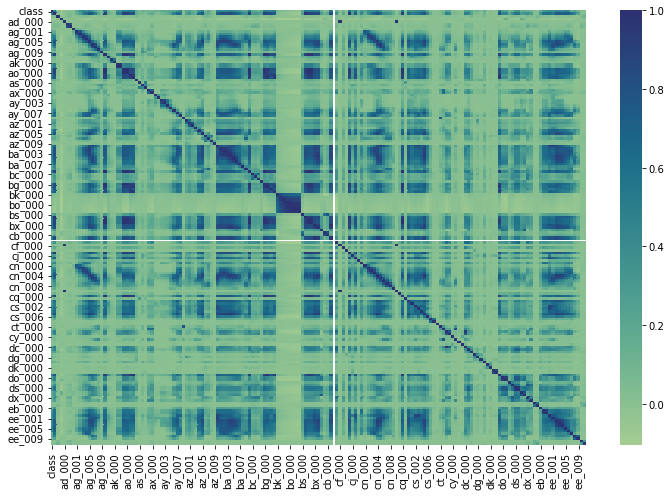

In [11]:
print("FOR TRAIN DATA")
corr_matrix = train_df.corr()
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap="crest")
plt.show()

FOR TEST DATA


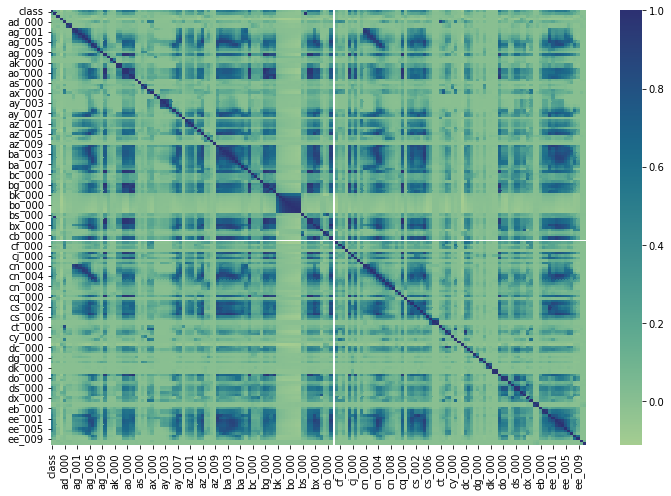

In [12]:
print("FOR TEST DATA")
corr_matrix = test_df.corr()
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap="crest")
plt.show()

iv. Pick ⌊ 170⌋ features with highest CV , and make scatter plots and box plots
for them, similar to those on p. 129 of ISLR. Can you draw conclusions about significance of those features, just by the scatter plots? This does not mean that you will only use those features in the following questions. We picked them only for visualization.


FROM HW5  
https://stackoverflow.com/questions/18358938/get-row-index-values-of-pandas-dataframe-as-list
https://stackoverflow.com/questions/41825978/sorting-columns-and-selecting-top-n-rows-in-each-group-pandas-dataframe

SNS PAIRPLOT running for too long   
https://stackoverflow.com/questions/37612434/what-are-ways-to-speed-up-seaborns-pairplot  
https://piazza.com/class/l7149q4oxue34e/post/1131  
https://piazza.com/class/l7149q4oxue34e/post/1158

Box plot - https://seaborn.pydata.org/generated/seaborn.boxplot.html


In [13]:
cv_range = math.floor(math.sqrt(170))
print(cv_range)
df1 = cv_xtrain.sort_values('CV for X Train Features',ascending = False).head(cv_range)
print(df1)
plot = X_train[list(df1.index.values)]

13
        CV for X Train Features
cf_000               244.887517
co_000               244.507385
ad_000               244.322816
cs_009               237.930554
dh_000               123.216097
dj_000               117.494225
ag_000                92.917755
as_000                87.332500
ay_009                84.733735
ak_000                80.424975
az_009                77.838544
ch_000                77.453857
au_000                68.882751


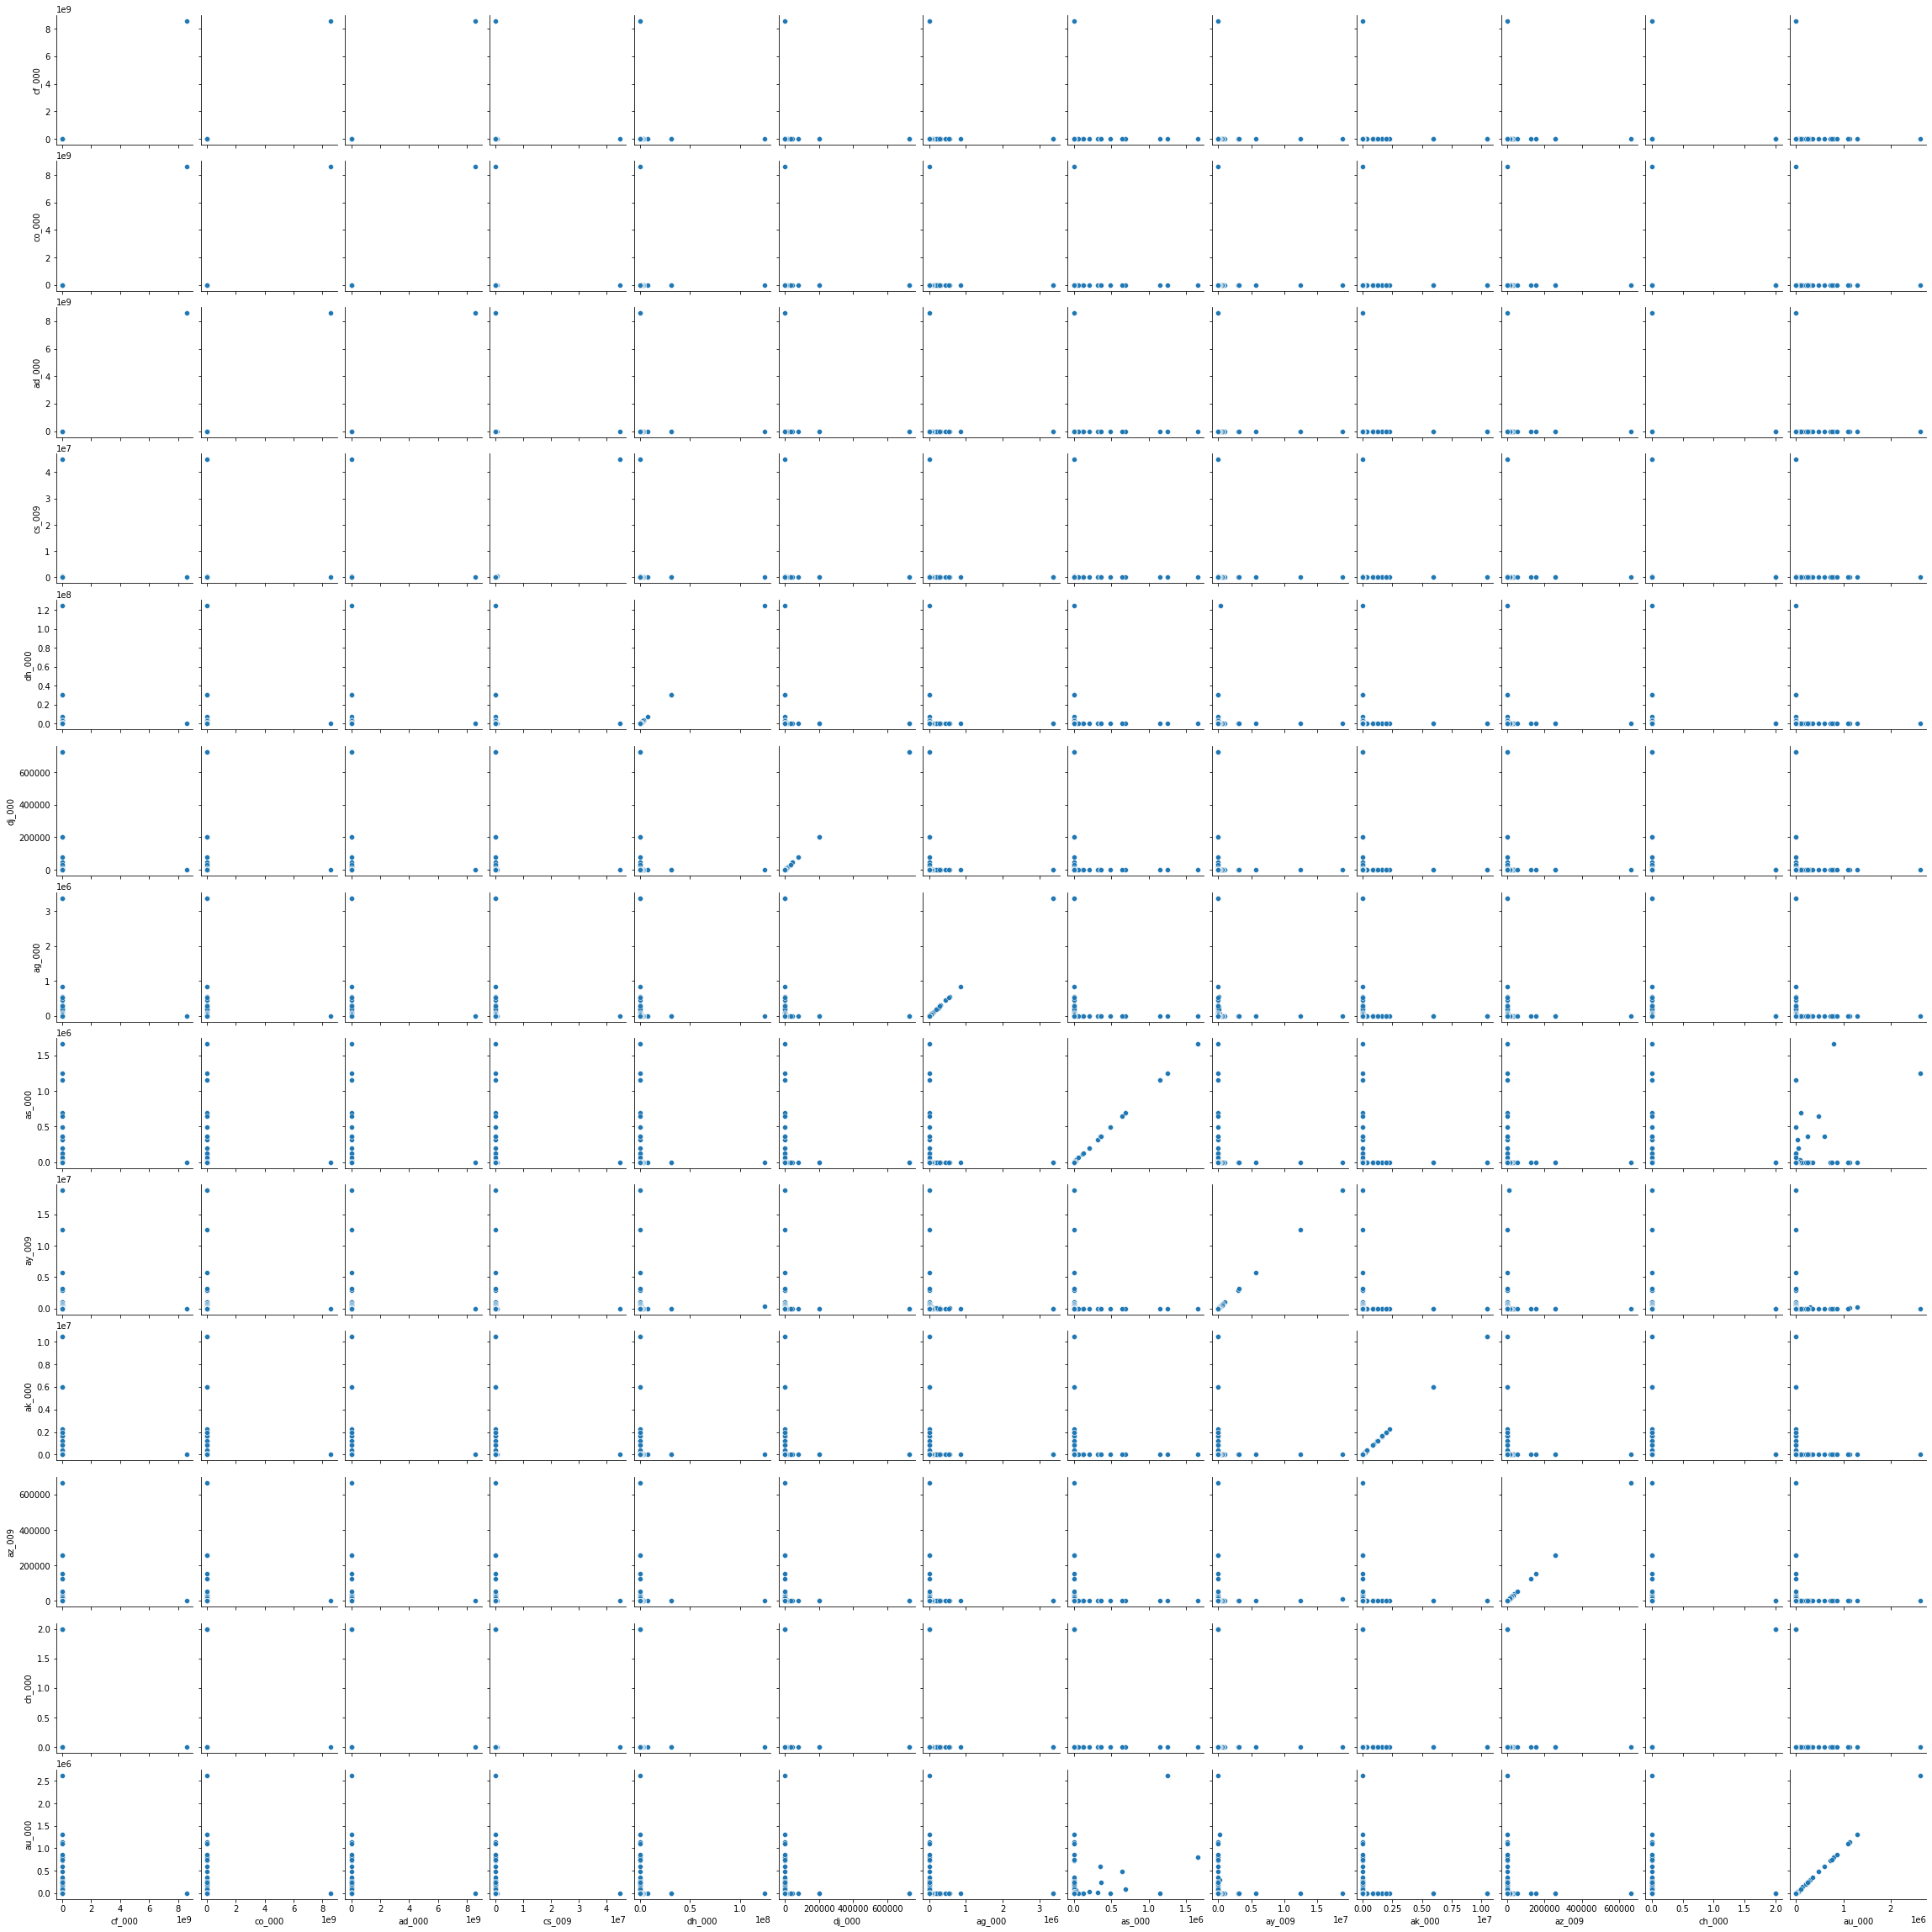

In [14]:
sns.pairplot(plot, diag_kind=None)
# sns.pairplot(plot, diag_kind='kde')
plt.show()

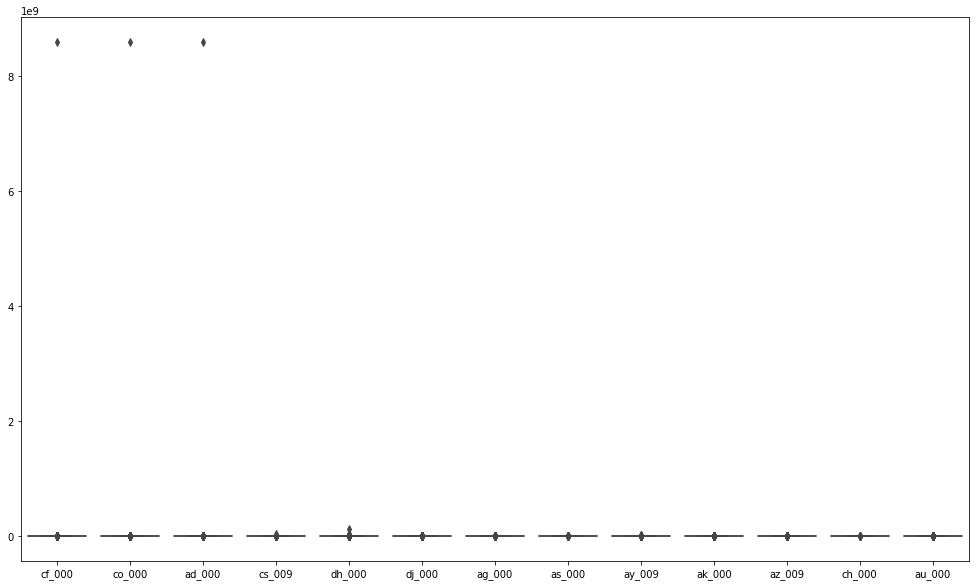

In [15]:
plt.figure(figsize = (17,10))
sns.boxplot(data = plot)

ANS: It is not possible to draw significant conclusions by just observing the plots

v. Determine the number of positive and negative data. Is this data set imbalanced?

https://www.statology.org/pandas-select-rows-based-on-column-values/  
https://pythonexamples.org/pandas-dataframe-count-rows/

ANS: This dataset is highly imbalanced as we can observe in both train and test files, the occurance of negative data is way more than that of positive data.

In [16]:
print("Number of positive data in train data : ", train_df.loc[train_df['class'] == 1].count()[0])
print("Number of negative data in train data : ", train_df.loc[train_df['class'] == 0].count()[0])
print("Number of positive data in test data : ", test_df.loc[test_df['class'] == 1].count()[0])
print("Number of negative data in test data : ", test_df.loc[test_df['class'] == 0].count()[0])

Number of positive data in train data :  1000
Number of negative data in train data :  59000
Number of positive data in test data :  375
Number of negative data in test data :  15625


c) Train a random forest to classify the data set. Do NOT compensate for class imbalance in the data set. Calculate the confusion matrix, ROC, AUC, and misclassification for training and test sets and report them (You may use pROC package). Calculate Out of Bag error estimate for your random forset and compare it to the test error.

ROC, AUC, Confusion matrix from HW4

In [17]:
def roc(model, X, y):
    probs = model.predict_proba(X)
    probs = probs[:, 1]
    fpr, tpr, _ = roc_curve(y, probs)
    plt.plot(fpr, tpr, label = 'ROC')
    plt.plot([0, 1], [0, 1], color = "green")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.title("ROC Curve & AOC")
    plt.show()
    return auc(fpr, tpr)

def confusion_mat(model, X, y):
    pred = model.predict(X)
    confusion = confusion_matrix(y, pred)
    tn, fp, fn, tp = confusion[0][0], confusion[0][1], confusion[1][0], confusion[1][1]
    tp_rate = tp / (tp + fn)
    tn_rate = tn / (tn + fp)
    #seaborn.heatmap(confusion_mat,annot=True,annot_kws= {"size":20},cmap="Blues ")
    sns.heatmap(confusion, annot = True, annot_kws = {"size": 30}, cmap = 'viridis')
    plt.show()
    print("True positive rate: ", tp_rate)
    print("True negative rate: ", tn_rate)
    print("Misclassification rate is:", 1 - model.score(X, y))

For Training data


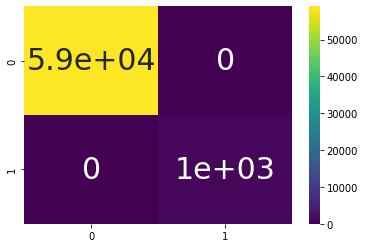

True positive rate:  1.0
True negative rate:  1.0
Misclassification rate is: 0.0


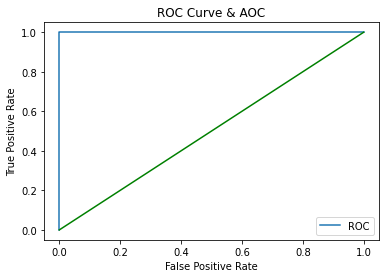

AUC for test data =  1.0


In [18]:
clf = RandomForestClassifier(random_state=0)
clf = clf.fit(X_train, y_train)
#y_pred = clf.predict(X_train)
print("For Training data")
confusion_mat(clf, X_train, y_train)
auc_rf_train = roc(clf, X_train, y_train)
print("AUC for test data = ", auc_rf_train)


For test data


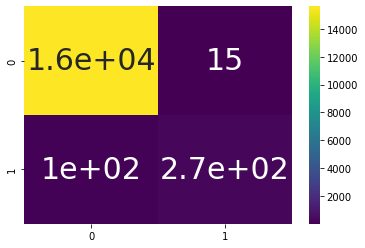

True positive rate:  0.7253333333333334
True negative rate:  0.99904
Misclassification rate is: 0.00737500000000002


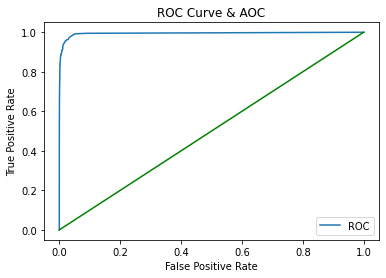

AUC for test data =  0.9943537493333334


In [19]:
print("For test data")
clf1 = RandomForestClassifier(random_state=0, oob_score=True)
clf1 = clf1.fit(X_train, y_train)
#y_pred = clf.predict(X_train)
confusion_mat(clf1, X_test, y_test)
auc_rf_model = roc(clf1, X_test, y_test)
print("AUC for test data = ", auc_rf_model)


In [20]:
print("Out of Bag error estimate for Random Forest = ",1 - clf1.oob_score_)
print("Testing Error rate = ", 1 - clf1.score(X_test, y_test))

Out of Bag error estimate for Random Forest =  0.006166666666666654
Testing Error rate =  0.00737500000000002


The Out of Bag Error Estimate for the random forest Classifier is less than the Test Error


(d) Research how class imbalance is addressed in random forests. Compensate for class imbalance in your random forest and repeat 1c. Compare the results with those of 1c.

In [21]:
sm = SMOTE(random_state = 2) 
X, y = sm.fit_resample(X_train, y_train)
X_test_sm, y_test_sm = sm.fit_resample(X_test, y_test)

For SMOTE on Train data


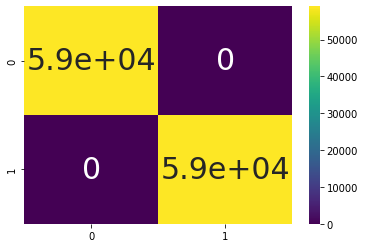

True positive rate:  1.0
True negative rate:  1.0
Misclassification rate is: 0.0


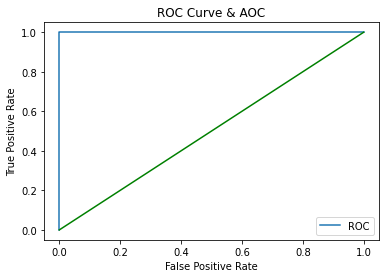

AUC for train data =  1.0


In [22]:
print("For SMOTE on Train data")
model_smote_train = RandomForestClassifier(random_state=0, oob_score=True)
model_smote_train = model_smote_train.fit(X, y)
#y_pred_smote = model_smote.predict(X)
confusion_mat(model_smote_train, X, y)
auc_smote_train = roc(model_smote_train, X, y)
print("AUC for train data = ", auc_smote_train)

For SMOTE on Test data


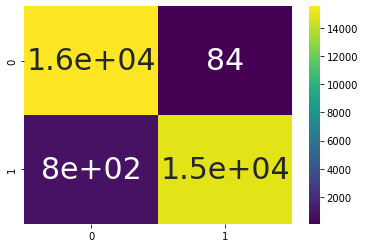

True positive rate:  0.949056
True negative rate:  0.994624
Misclassification rate is: 0.028159999999999963


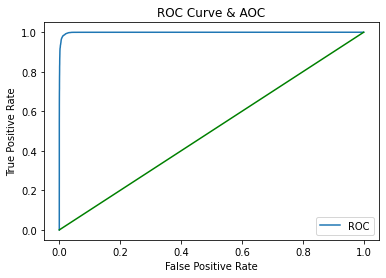

AUC for test data =  0.998843383808


In [23]:
print("For SMOTE on Test data")
model_smote = RandomForestClassifier(random_state=0, oob_score=True)
model_smote = model_smote.fit(X, y)
#y_pred_smote = model_smote.predict(X)
confusion_mat(model_smote, X_test_sm, y_test_sm)
auc_smote = roc(model_smote, X_test_sm, y_test_sm)
print("AUC for test data = ", auc_smote)

In [24]:
print("Out of Bag error estimate for Random Forest = ",1 - model_smote.oob_score_)
print("Testing Error rate = ", 1 - model_smote.score(X_test_sm, y_test_sm))

Out of Bag error estimate for Random Forest =  0.0031864406779661403
Testing Error rate =  0.028159999999999963


(e) XGBoost and Model Trees


In [25]:
#alpha_list = 10 ** np.linspace(10,-1,20) * 0.5 
# alpha_list=[0, 0.001, 0.003, 0.005, 0.007, 0.01]
#param_grid = {"reg_alpha": [0.01, 0.02, 0.05, 0.08, 0.1, 0.5, 0.8, 1, 2, 3, 4, 5, 10, 20, 30, 40, 50, 100, 200]}
alpha_list= [10**i for i in range(-3,4)]
error_list = []
alpha_all = []

for i in alpha_list:
    #xg_model = xg.XGBRegressor(alpha = i, objective="reg:squarederror")
    xg_model = xgb.XGBClassifier(objective = 'binary:logistic', alpha=i)
    k_fold = KFold(n_splits=5, shuffle = True)
    scores = cross_val_score(xg_model, X_train, y_train, cv=k_fold)
    error_list.append(abs(scores.mean()))
    alpha_all.append(i)

In [26]:
alpha = alpha_all[error_list.index(min(error_list))]
print("Alpha obtained by cross validation = ", alpha)


Alpha obtained by cross validation =  0.1


In [27]:
xgb_model = xgb.XGBClassifier(objective = 'binary:logistic', alpha=alpha)
xgb_model = xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_train)
mse_xgb_train = mean_squared_error(y_train, y_pred)
print("Test error by least squares (MSE) for XGBoost is = ", mse_xgb_train)
print("The least test error for XGBoost is at alpha = ", alpha)

Test error by least squares (MSE) for XGBoost is =  0.004683333333333334
The least test error for XGBoost is at alpha =  0.1


For Training data XGBoost


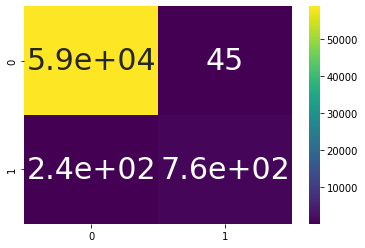

True positive rate:  0.764
True negative rate:  0.9992372881355932
Misclassification rate is: 0.004683333333333373


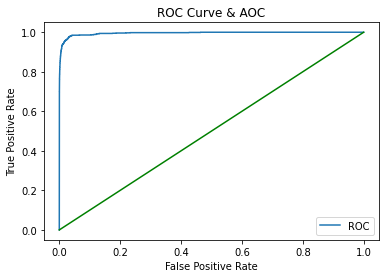

AUC for train data =  0.9954675508474576


In [28]:
print("For Training data XGBoost")
confusion_mat(xgb_model, X_train, y_train)
auc_xg_train = roc(xgb_model, X_train, y_train)
print("AUC for train data = ", auc_xg_train)

In [29]:
print("For Testing data XGBoost")
xg_model = xgb.XGBClassifier(objective = 'binary:logistic', alpha=alpha)
xg_model = xg_model.fit(X_train, y_train)
y_pred = xg_model.predict(X_test)
mse_xg_test = mean_squared_error(y_test, y_pred)
print("Test error by least squares (MSE) for XGBoost is = ", mse_xg_test)
print("The least test error for XGBoost is at alpha = ", alpha)

For Testing data XGBoost
Test error by least squares (MSE) for XGBoost is =  0.0086875
The least test error for XGBoost is at alpha =  0.1


For Testing data XGBoost


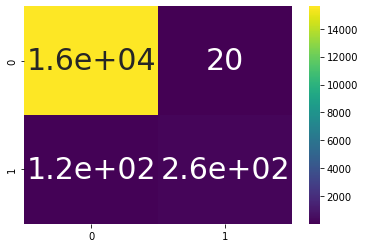

True positive rate:  0.6826666666666666
True negative rate:  0.99872
Misclassification rate is: 0.00868749999999996


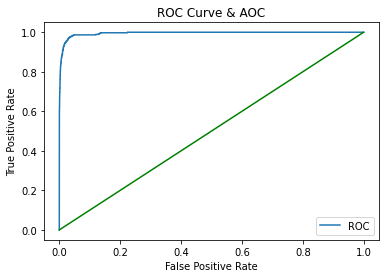

AUC for test data =  0.9950931626666666


In [30]:
print("For Testing data XGBoost")
confusion_mat(xg_model, X_test, y_test)
auc_xg_test = roc(xg_model, X_test, y_test)
print("AUC for test data = ", auc_xg_test)

(f) Use SMOTE (Synthetic Minority Over-sampling Technique) to pre-process your data to compensate for class imbalance.4 Train XGBosst with L1-penalized lo- gistic regression at each node using the pre-processed data and repeat 1e. Do not forget that there is a right and a wrong way of cross validation here. Compare the uncompensated case with SMOTE case.

In [31]:
sm = SMOTE(random_state=2)
X, y = sm.fit_resample(X_train, y_train)
# model_smote1 = RandomForestClassifier(random_state=0, oob_score=True)
# model_smote1 = model_smote1.fit(X, y)

alpha_list= [10**i for i in range(-3,4)]
error_list = []
alpha_all = []

for i in alpha_list:
    #xg_model = xg.XGBRegressor(alpha = i, objective="reg:squarederror")
    xgboost1 = xgb.XGBClassifier(objective = 'binary:logistic', alpha=i)
    k_fold = KFold(n_splits=5, shuffle = True)
    scores = cross_val_score(xgboost1, X, y, cv=k_fold)
    error_list.append(abs(scores.mean()))
    print(error_list)
    alpha_all.append(i)

[0.9837966101694915]
[0.9837966101694915, 0.9838898305084746]
[0.9837966101694915, 0.9838898305084746, 0.9842796610169492]
[0.9837966101694915, 0.9838898305084746, 0.9842796610169492, 0.9843135593220339]
[0.9837966101694915, 0.9838898305084746, 0.9842796610169492, 0.9843135593220339, 0.9839406779661017]
[0.9837966101694915, 0.9838898305084746, 0.9842796610169492, 0.9843135593220339, 0.9839406779661017, 0.9843728813559321]
[0.9837966101694915, 0.9838898305084746, 0.9842796610169492, 0.9843135593220339, 0.9839406779661017, 0.9843728813559321, 0.9843050847457627]


In [32]:
alpha = alpha_all[error_list.index(min(error_list))]
print("Alpha obtained by cross validation = ", alpha)

Alpha obtained by cross validation =  0.001


In [33]:
xg_model_sm = xgb.XGBClassifier(objective = 'binary:logistic', alpha=alpha)
fit_sm = xg_model_sm.fit(X, y)
y_pred = fit_sm.predict(X)
mse_xgtrain_sm = mean_squared_error(y, y_pred)
print("Train error by least squares (MSE) for XGBoost with SMOTE = ", mse_xgtrain_sm)
print("The least test error for XGBoost is at alpha = ", alpha)

Train error by least squares (MSE) for XGBoost with SMOTE =  0.014805084745762712
The least test error for XGBoost is at alpha =  0.001


For Training data XGBoost with SMOTE


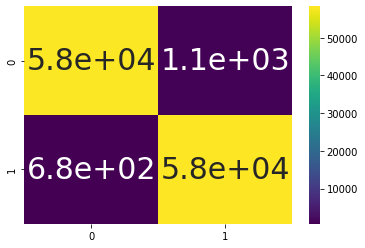

True positive rate:  0.9885593220338983
True negative rate:  0.9818305084745763
Misclassification rate is: 0.014805084745762698


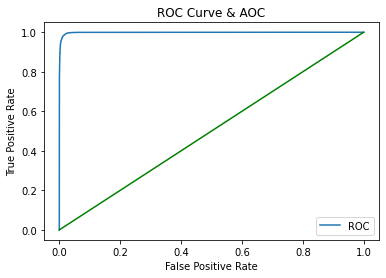

AUC for train data =  0.9988898761850044


In [34]:
print("For Training data XGBoost with SMOTE")
confusion_mat(fit_sm, X, y)
auc_xgsm_train = roc(fit_sm, X, y)
print("AUC for train data = ", auc_xgsm_train)

In [35]:
X_test_sm, y_test_sm = sm.fit_resample(X_test, y_test)
xg_model_sm2 = xgb.XGBClassifier(objective = 'binary:logistic', alpha=alpha)
fit_sm2 = xg_model_sm2.fit(X, y)
y_pred = fit_sm2.predict(X_test_sm)
mse_xgtest_sm = mean_squared_error(y_test_sm, y_pred)
print("Train error by least squares (MSE) for XGBoost with SMOTE = ", mse_xgtest_sm)
print("The least test error for XGBoost is at alpha = ", alpha)

Train error by least squares (MSE) for XGBoost with SMOTE =  0.015136
The least test error for XGBoost is at alpha =  0.001


For Testing data XGBoost with SMOTE


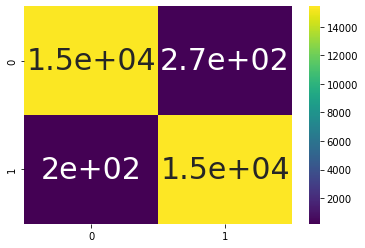

True positive rate:  0.9872
True negative rate:  0.982528
Misclassification rate is: 0.015136000000000038


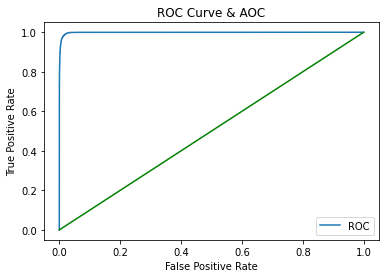

AUC for test data =  0.998840397824


In [36]:
print("For Testing data XGBoost with SMOTE")
confusion_mat(fit_sm2, X_test_sm, y_test_sm)
auc_xgsm_test = roc(fit_sm2, X_test_sm, y_test_sm)
print("AUC for test data = ", auc_xgsm_test)

# 2. ISLR 6.6.3

(a) iv. steadily decrease.  
EXPLANATION : With increase in s from 0, the β values also increase from 0 to the least square estimate values. Thus RSS decreases steadily to reach the least squares answer. 

(b) ii. Decrease initially, and then eventually start increasing in a U shape.
EXPLANATION : When s is 0, all β will also be zero , so here we will have a Null model. With increase in s, the constraint loosens and model will become more flexible and fit better to the data. Thus, the test RSS will decrease. 
After a point, the model starts to overfit and RSS will start to increase again in a U shape. 

(c) iii. Steadily increase.  
EXPLANATION : When s in increased from 0, the model flexibility increases as the model fits the data better, variance also increases.

(d) iv. Steadily decrease.  
EXPLANATION : When s is 0, it is Null model predicting constant value, Bias is high here. With increase in s, model flexibility increases and bias will steadily decrease. 

(e) v. Remain constant.  
EXPLANATION : Irreducible error in a model remains constant regradless of the flexibilty. There are many unmeasurable variations that cannot be predicted in y, which is captured by the irreducible errors. So irreducible error is independent of s. 

# 3. ISLR, 6.6.5 


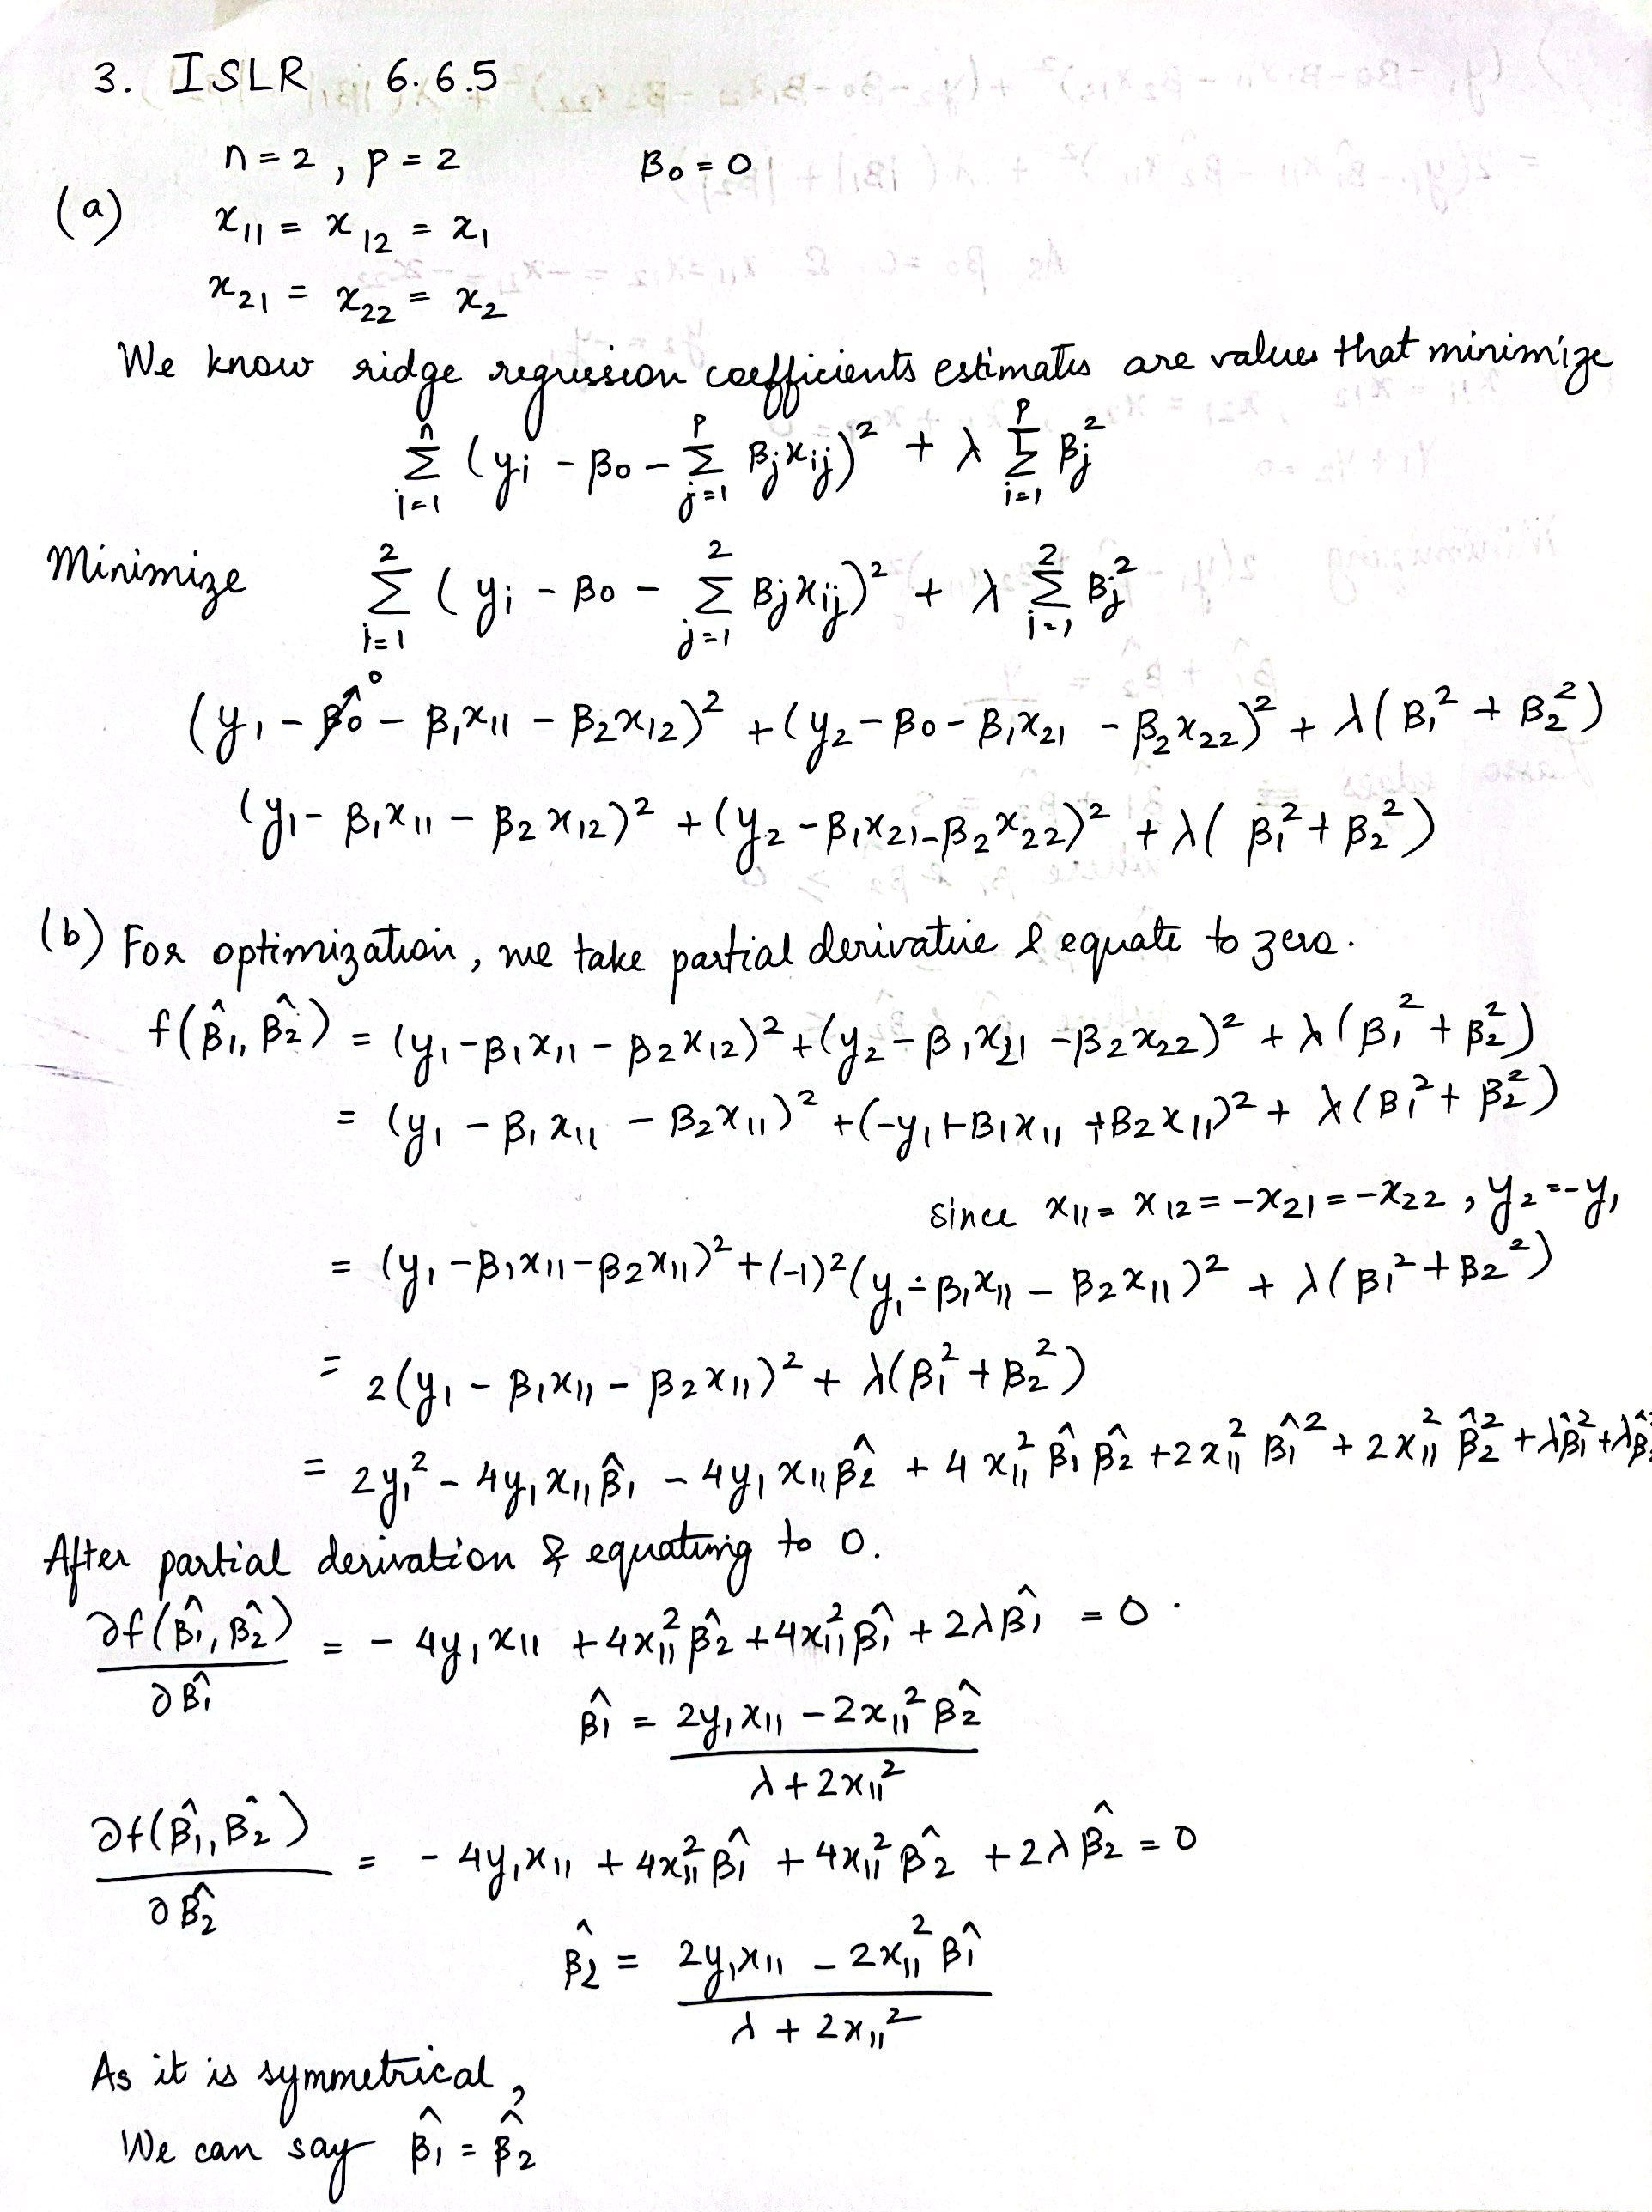

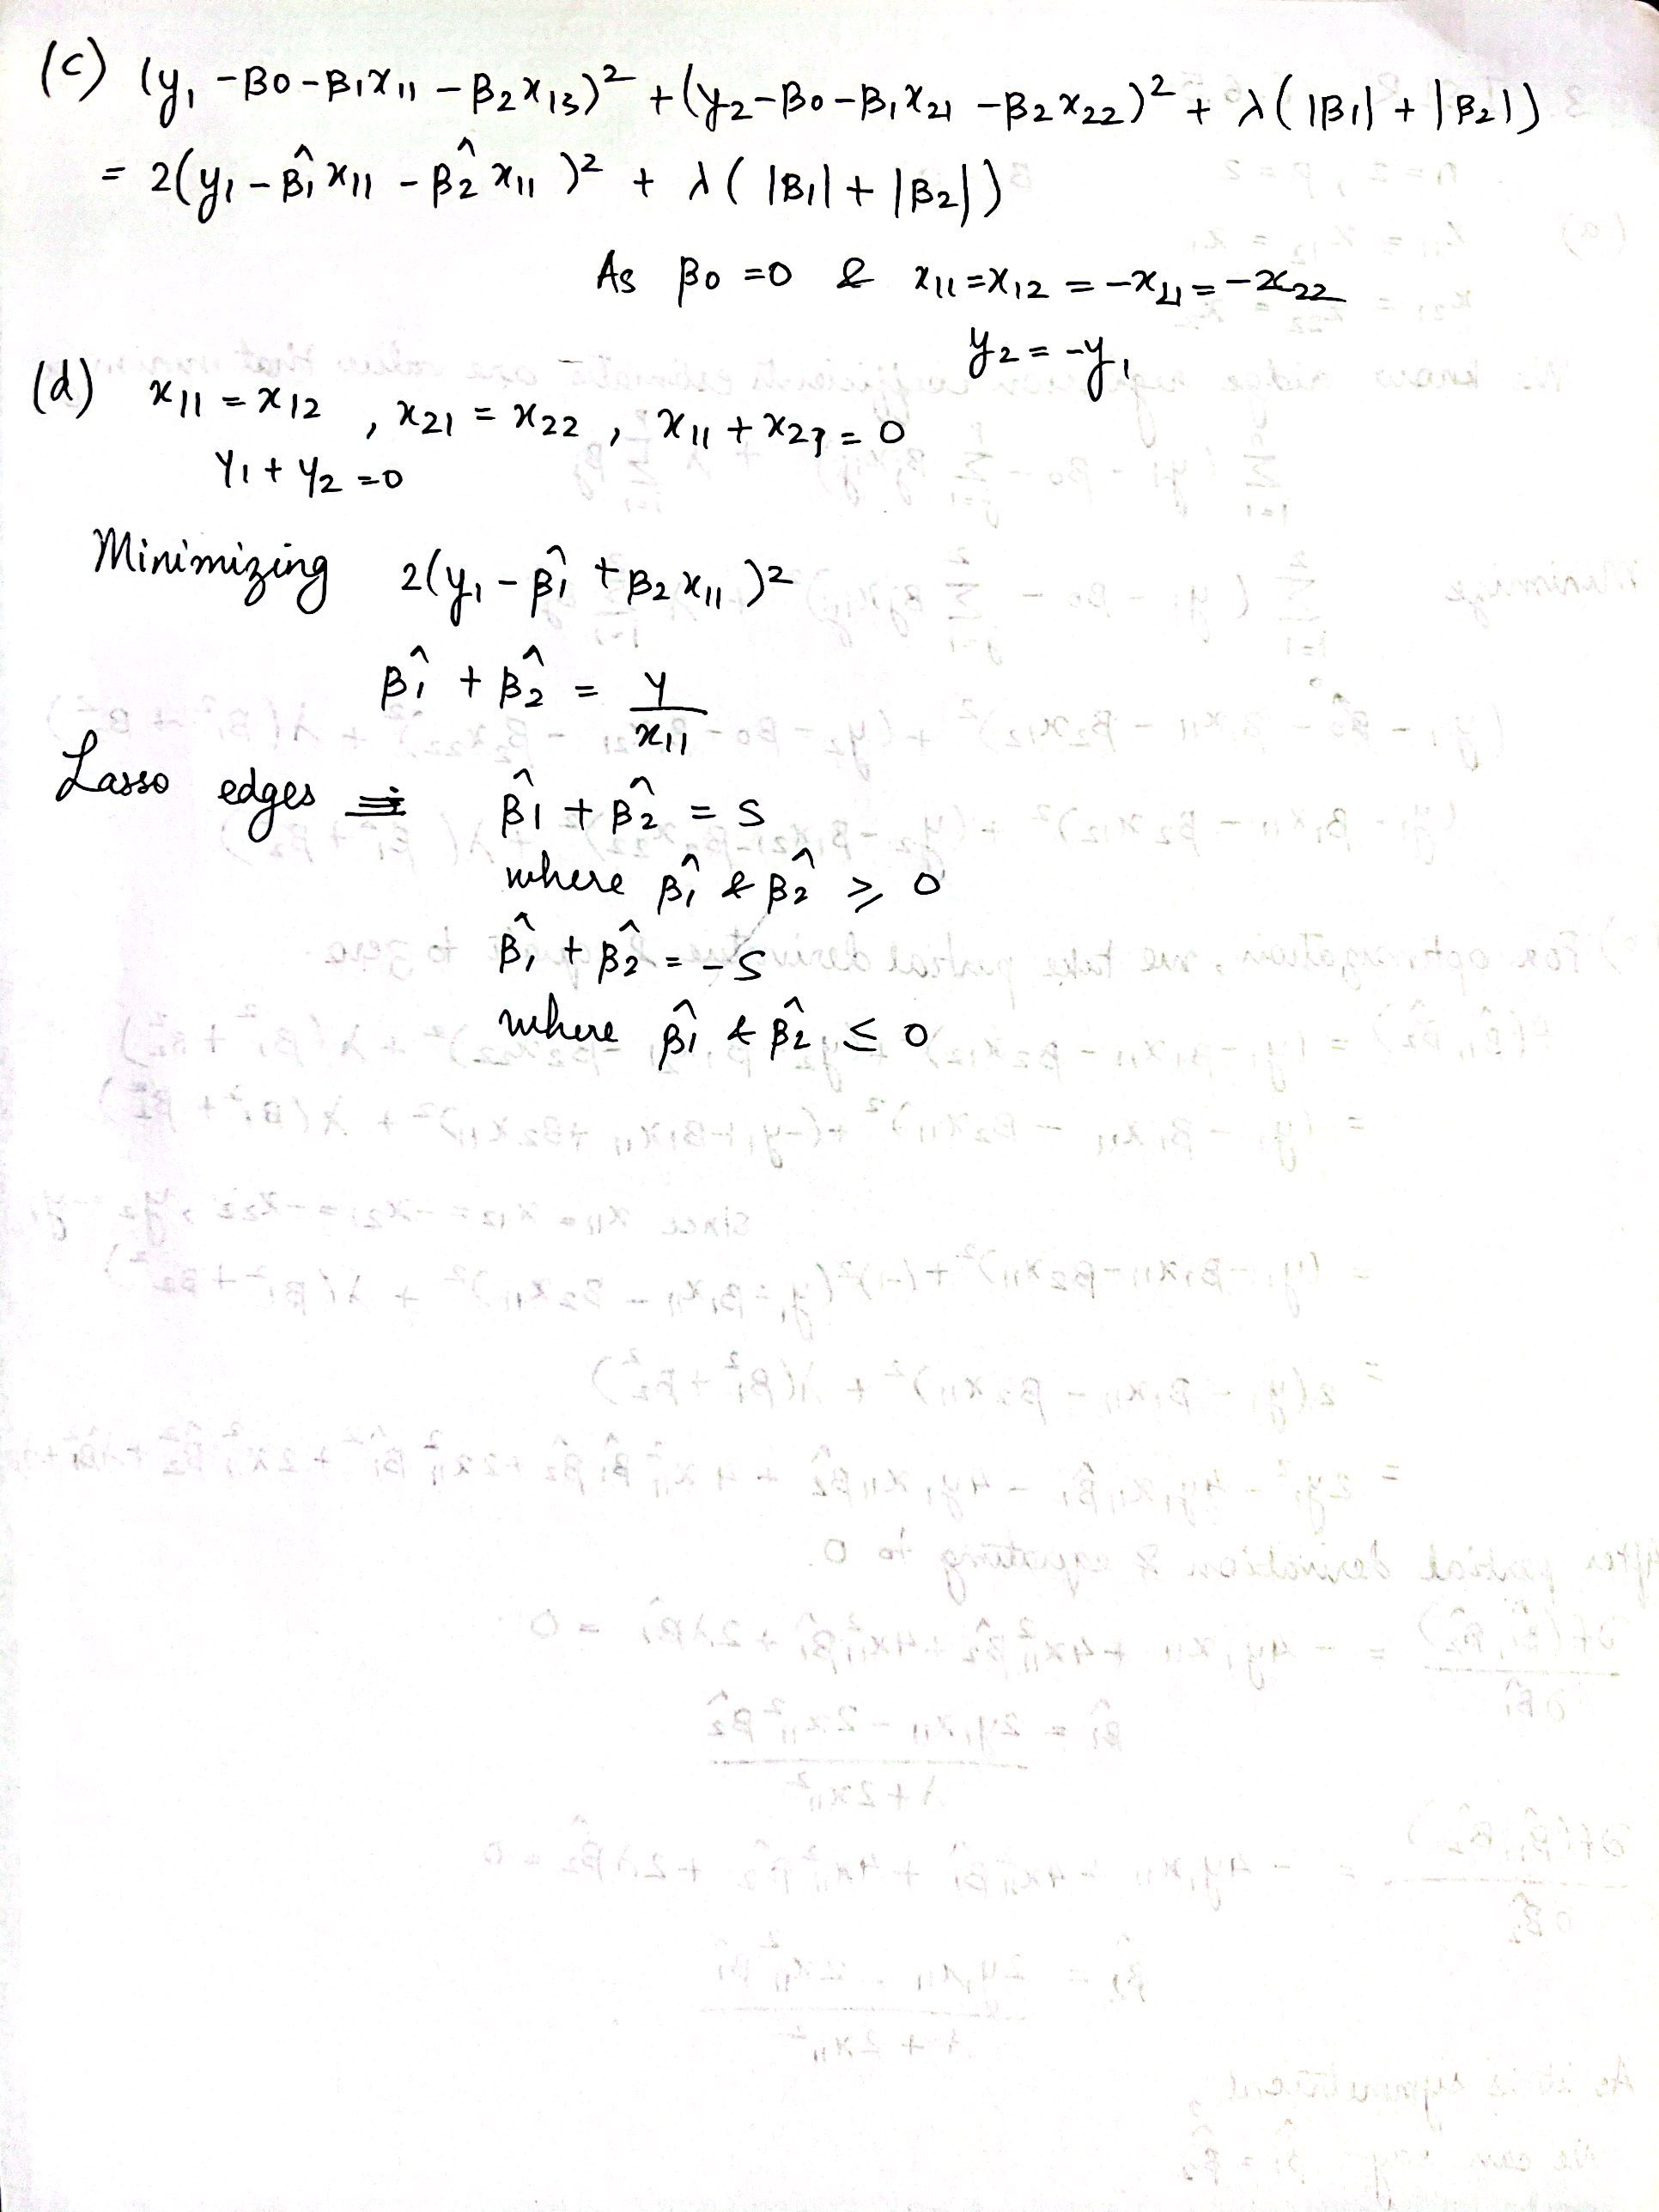

# 4. ISLR 8.4.5
0.1,0.15,0.2,0.2,0.55,0.6,0.6,0.65,0.7, 0.75

sum( (0.1, 0.15, 0.2, 0.2, 0.55, 0.6, 0.6, 0.65, 0.7, 0.75) >= 0.5 ) > sum( (0.1, 0.15, 0.2, 0.2, 0.55, 0.6, 0.6, 0.65, 0.7, 0.75) < 0.5 ) 


True ==> Number of predictions for RED class is greater than Number of predictions for GREEN class. 
The predictions are on a 50% threshold. The resulting classification is RED class.

mean( (0.1, 0.15, 0.2, 0.2, 0.55, 0.6, 0.6, 0.65, 0.7, 0.75) ) = 0.45
The mean is less than the 50% of the threshold. The resulting classification is GREEN class.


# 5. ISLR 9.7.3

(a) We are given n = 7 observations in p = 2 dimensions. For each observation, there is an associated class label.  


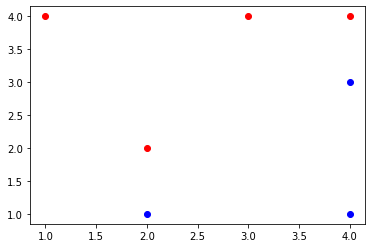

In [42]:
X1 = np.array([3, 2, 4, 1, 2, 4, 4])
X2 =  np.array([4, 2, 4, 4, 1, 3, 1])
Y = ["red", "red", "red", "red", "blue", "blue", "blue"]

for i in range(len(X1)):
    plt.scatter(X1[i], X2[i], c=Y[i])

plt.show()

(b)Sketch the optimal separating hyperplane, and provide the equation for this hyperplane (of the form (9.1)).

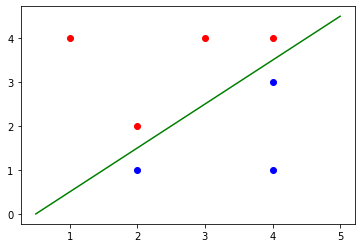

In [43]:
plt.plot([0.5, 5], [0, 4.5], 'g-')
for i in range(len(X1)):
    plt.scatter(X1[i], X2[i], c=Y[i])
plt.show()


(c) Describe the classification rule for the maximal margin classifier. It should be something along the lines of “Classify to Red if β0 + β1X1 + β2X2 > 0, and classify to Blue otherwise.” Provide the values for β0, β1, and β2.

ANS: RED class above the line else BLUE class. 

i.e. if X1 − X2 − 0.5 < 0 the Class = RED else Class = BLUE



(d) On your sketch, indicate the margin for the maximal margin hyperplane.

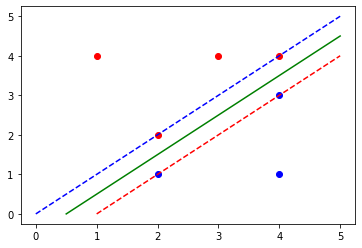

In [44]:
plt.plot([1,5],[0,4], 'r--')
plt.plot([0,5],[0,5], 'b--')
plt.plot([0.5, 5], [0, 4.5], 'g-')
for i in range(len(X1)):
    plt.scatter(X1[i], X2[i], c=Y[i])
plt.show()

(e) Indicate the support vectors for the maximal margin classifier.

ANS : (2,2), (4,3), (4,4) (2,1) are the support vectors

(f) Argue that a slight movement of the seventh observation would not affect the maximal margin hyperplane.

ANS : The 7th observation is not support vector. 
Therefore, a small change in this observation won't affect the maximum margin.


(g) Sketch a hyperplane that is not the optimal separating hyperplane, and provide the equation for this hyperplane.

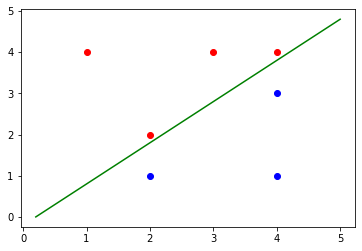

In [45]:
plt.plot([0.2, 5], [0, 4.8], 'g-')
for i in range(len(X1)):
    plt.scatter(X1[i], X2[i], c=Y[i])
plt.show()


(h) Draw an additional observation on the plot so that the two classes are no longer separable by a hyperplane.

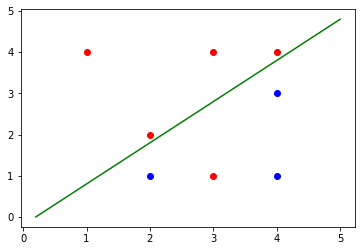

In [46]:
plt.plot([0.2, 5], [0, 4.8], 'g-')
plt.scatter([3], [1], c = ["red"])
for i in range(len(X1)):
    plt.scatter(X1[i], X2[i], c=Y[i])
plt.show()
